#**Import Libraries**

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import warnings
warnings.filterwarnings("ignore")
!pip install summary
from torchsummary import summary

#**Data Download and Transforms**

In [2]:
from utils import Transforms
transforms_obj = Transforms()
train = transforms_obj.download_train_data()
test = transforms_obj.download_test_data()

Files already downloaded and verified


#**Data Loaders**

In [3]:
from utils import TrainTestDataloaders
train_test_dataloaders = TrainTestDataloaders()
train_loader = train_test_dataloaders.get_train_dataloader(train)
test_loader = train_test_dataloaders.get_train_dataloader(test)

#**Showing some sample images**

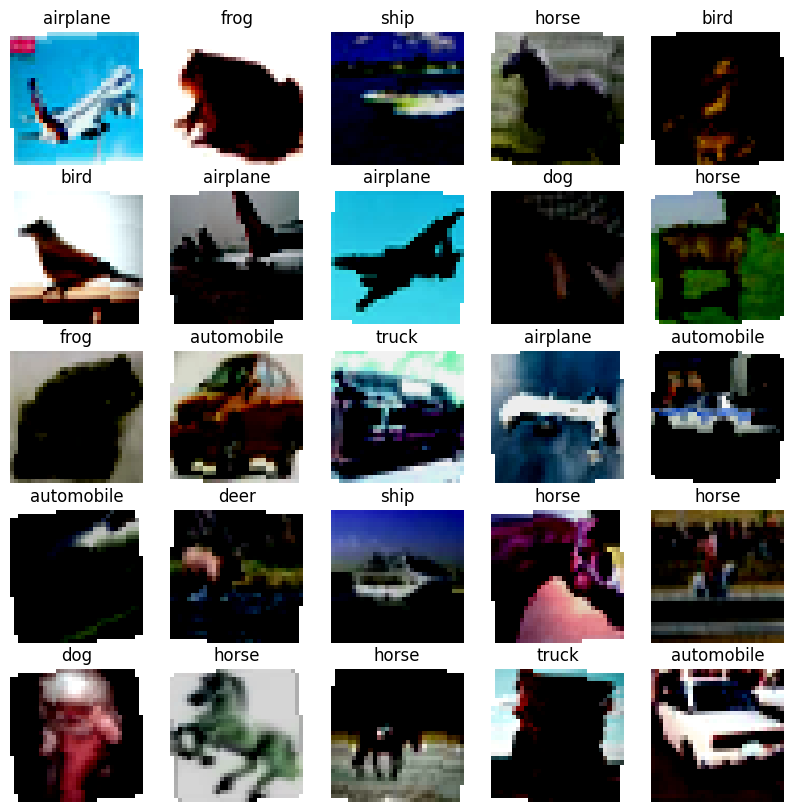

In [4]:
import warnings
from utils import SampleData
warnings.filterwarnings("ignore")
sample_data = SampleData()
sample_data.show_sample_images(train_loader, train.classes)

#**BATCH NORMALISATION**

###**Model**

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [6]:
from models import ModelBN
model = ModelBN().to(device)
summary(model, input_size = (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]             512
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 32,

###**Train and Test Model**

In [7]:
from train_test_models import Train_Test_With_LR_Scheduler
train_test_obj = Train_Test_With_LR_Scheduler()
train_losses, test_losses, train_acc, test_acc = train_test_obj.train_and_test_model(model, device, 20, train_loader, test_loader)

EPOCH: 0


loss=1.3870397806167603 Batch_id=390 Accuracy=38.06: 100%|██████████| 391/391 [01:34<00:00,  4.16it/s]



 Test set: Average loss: 1.4808, Accuracy: 4477/10000 (44.77%)

EPOCH: 1


loss=1.2046226263046265 Batch_id=390 Accuracy=53.84: 100%|██████████| 391/391 [01:29<00:00,  4.35it/s]



 Test set: Average loss: 1.1444, Accuracy: 5928/10000 (59.28%)

EPOCH: 2


loss=0.9222505688667297 Batch_id=390 Accuracy=61.66: 100%|██████████| 391/391 [01:29<00:00,  4.39it/s]



 Test set: Average loss: 0.9635, Accuracy: 6511/10000 (65.11%)

EPOCH: 3


loss=0.9481741786003113 Batch_id=390 Accuracy=65.05: 100%|██████████| 391/391 [01:29<00:00,  4.39it/s]



 Test set: Average loss: 0.9146, Accuracy: 6741/10000 (67.41%)

EPOCH: 4


loss=0.8349229693412781 Batch_id=390 Accuracy=67.83: 100%|██████████| 391/391 [01:28<00:00,  4.40it/s]



 Test set: Average loss: 0.8907, Accuracy: 6847/10000 (68.47%)

EPOCH: 5


loss=0.8580285310745239 Batch_id=390 Accuracy=69.30: 100%|██████████| 391/391 [01:29<00:00,  4.37it/s]



 Test set: Average loss: 0.8448, Accuracy: 6993/10000 (69.93%)

EPOCH: 6


loss=0.8013753890991211 Batch_id=390 Accuracy=72.24: 100%|██████████| 391/391 [01:29<00:00,  4.37it/s]



 Test set: Average loss: 0.7551, Accuracy: 7313/10000 (73.13%)

EPOCH: 7


loss=0.6819501519203186 Batch_id=390 Accuracy=73.06: 100%|██████████| 391/391 [01:28<00:00,  4.43it/s]



 Test set: Average loss: 0.7578, Accuracy: 7322/10000 (73.22%)

EPOCH: 8


loss=0.668613076210022 Batch_id=390 Accuracy=73.61: 100%|██████████| 391/391 [01:29<00:00,  4.38it/s]



 Test set: Average loss: 0.7487, Accuracy: 7373/10000 (73.73%)

EPOCH: 9


loss=0.8603132963180542 Batch_id=390 Accuracy=74.03: 100%|██████████| 391/391 [01:30<00:00,  4.33it/s]



 Test set: Average loss: 0.7577, Accuracy: 7307/10000 (73.07%)

EPOCH: 10


loss=0.7977370023727417 Batch_id=390 Accuracy=74.01: 100%|██████████| 391/391 [01:28<00:00,  4.40it/s]



 Test set: Average loss: 0.7424, Accuracy: 7369/10000 (73.69%)

EPOCH: 11


loss=0.6761595010757446 Batch_id=390 Accuracy=74.44: 100%|██████████| 391/391 [01:27<00:00,  4.45it/s]



 Test set: Average loss: 0.7361, Accuracy: 7385/10000 (73.85%)

EPOCH: 12


loss=0.6855288743972778 Batch_id=390 Accuracy=74.65: 100%|██████████| 391/391 [01:28<00:00,  4.44it/s]



 Test set: Average loss: 0.7366, Accuracy: 7384/10000 (73.84%)

EPOCH: 13


loss=0.8454986810684204 Batch_id=390 Accuracy=74.78: 100%|██████████| 391/391 [01:27<00:00,  4.45it/s]



 Test set: Average loss: 0.7314, Accuracy: 7419/10000 (74.19%)

EPOCH: 14


loss=0.6270008683204651 Batch_id=390 Accuracy=74.66: 100%|██████████| 391/391 [01:28<00:00,  4.41it/s]



 Test set: Average loss: 0.7309, Accuracy: 7400/10000 (74.00%)

EPOCH: 15


loss=0.6781904697418213 Batch_id=390 Accuracy=74.70: 100%|██████████| 391/391 [01:28<00:00,  4.41it/s]



 Test set: Average loss: 0.7301, Accuracy: 7397/10000 (73.97%)

EPOCH: 16


loss=0.68979811668396 Batch_id=390 Accuracy=74.90: 100%|██████████| 391/391 [01:30<00:00,  4.31it/s]



 Test set: Average loss: 0.7344, Accuracy: 7399/10000 (73.99%)

EPOCH: 17


loss=0.7391403317451477 Batch_id=390 Accuracy=74.57: 100%|██████████| 391/391 [01:30<00:00,  4.32it/s]



 Test set: Average loss: 0.7348, Accuracy: 7403/10000 (74.03%)

EPOCH: 18


loss=0.6508544683456421 Batch_id=390 Accuracy=74.91: 100%|██████████| 391/391 [01:31<00:00,  4.27it/s]



 Test set: Average loss: 0.7320, Accuracy: 7395/10000 (73.95%)

EPOCH: 19


loss=0.7147979736328125 Batch_id=390 Accuracy=74.77: 100%|██████████| 391/391 [01:31<00:00,  4.27it/s]



 Test set: Average loss: 0.7283, Accuracy: 7405/10000 (74.05%)



###**Visualise train and test performance**

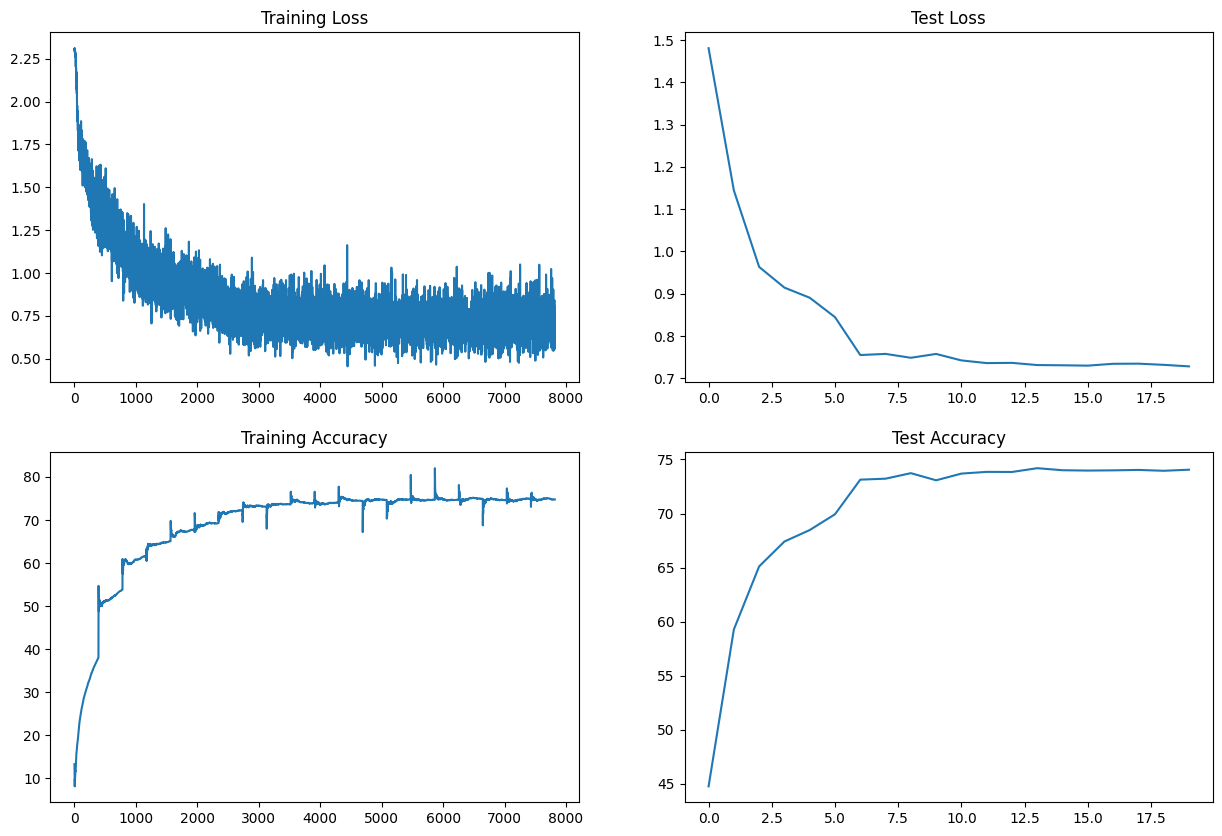

In [8]:
from train_test_models import *
result_visualisation_obj = ResultVisualisation()
result_visualisation_obj.plot_accuracy_and_loss(train_losses, test_losses, train_acc, test_acc)

###**Showing some misclassified Images**

25 25 25


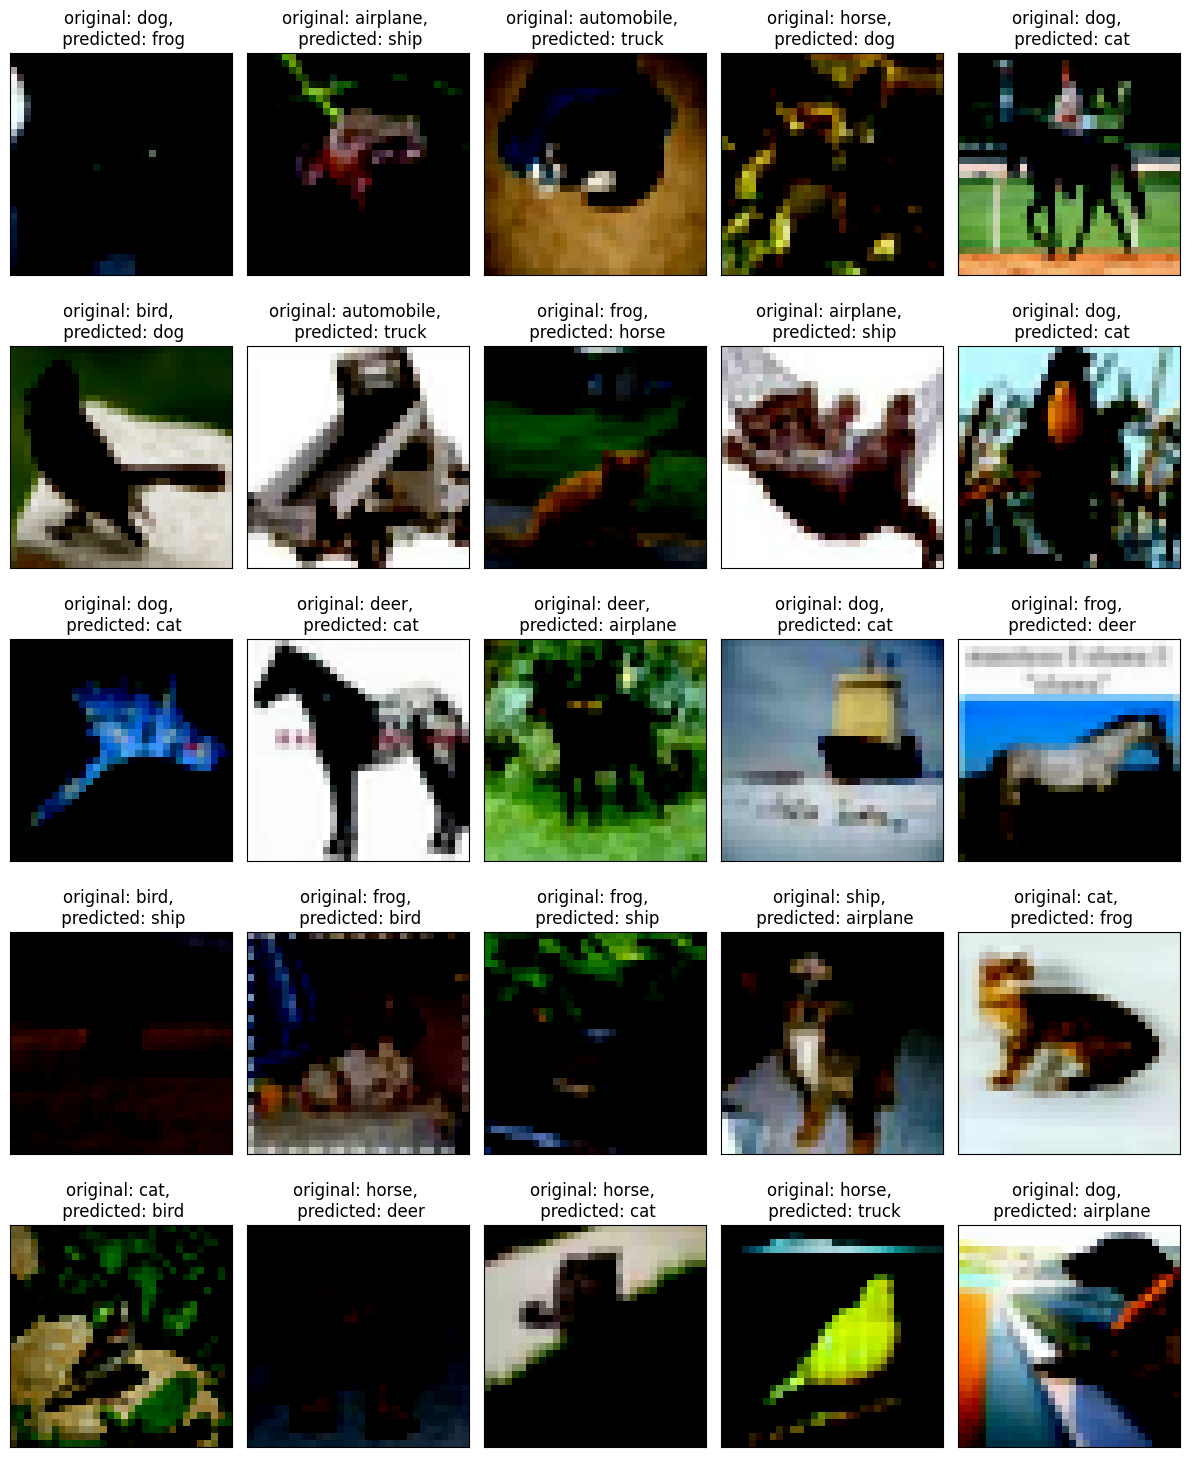

In [9]:
from utils import SampleData
sample_data = SampleData()
sample_data.show_misclassified_images(train_test_obj.misclassified_images, train_test_obj.original_labels, train_test_obj.predicted_labels, train.classes)

#**LAYER NORMALISATION**

### **Model**

In [10]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [11]:
from models import LayerNorm, ModelLN
model = ModelLN().to(device)
summary(model, input_size = (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         LayerNorm-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
         LayerNorm-7           [-1, 16, 32, 32]               0
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]             512
             ReLU-10           [-1, 32, 32, 32]               0
        LayerNorm-11           [-1, 32, 32, 32]               0
          Dropout-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 32,

###**Train and Test Model**

In [12]:
from train_test_models import Train_Test_With_LR_Scheduler
train_test_obj = Train_Test_With_LR_Scheduler()
train_losses, test_losses, train_acc, test_acc = train_test_obj.train_and_test_model(model, device, 20, train_loader, test_loader)

EPOCH: 0


loss=1.4990029335021973 Batch_id=390 Accuracy=36.91: 100%|██████████| 391/391 [01:32<00:00,  4.22it/s]



 Test set: Average loss: 1.3641, Accuracy: 4956/10000 (49.56%)

EPOCH: 1


loss=1.2727038860321045 Batch_id=390 Accuracy=53.93: 100%|██████████| 391/391 [01:37<00:00,  4.03it/s]



 Test set: Average loss: 1.1161, Accuracy: 5966/10000 (59.66%)

EPOCH: 2


loss=1.064163088798523 Batch_id=390 Accuracy=59.94: 100%|██████████| 391/391 [01:34<00:00,  4.14it/s]



 Test set: Average loss: 1.0018, Accuracy: 6429/10000 (64.29%)

EPOCH: 3


loss=0.9727888107299805 Batch_id=390 Accuracy=63.20: 100%|██████████| 391/391 [01:33<00:00,  4.19it/s]



 Test set: Average loss: 0.9555, Accuracy: 6600/10000 (66.00%)

EPOCH: 4


loss=0.8890256881713867 Batch_id=390 Accuracy=65.51: 100%|██████████| 391/391 [01:32<00:00,  4.24it/s]



 Test set: Average loss: 0.8750, Accuracy: 6902/10000 (69.02%)

EPOCH: 5


loss=0.9543339610099792 Batch_id=390 Accuracy=67.06: 100%|██████████| 391/391 [01:32<00:00,  4.24it/s]



 Test set: Average loss: 0.8575, Accuracy: 6953/10000 (69.53%)

EPOCH: 6


loss=0.8244315981864929 Batch_id=390 Accuracy=70.07: 100%|██████████| 391/391 [01:33<00:00,  4.16it/s]



 Test set: Average loss: 0.7978, Accuracy: 7185/10000 (71.85%)

EPOCH: 7


loss=0.749175488948822 Batch_id=390 Accuracy=70.91: 100%|██████████| 391/391 [01:33<00:00,  4.20it/s]



 Test set: Average loss: 0.7896, Accuracy: 7181/10000 (71.81%)

EPOCH: 8


loss=0.9579064249992371 Batch_id=390 Accuracy=71.38: 100%|██████████| 391/391 [01:31<00:00,  4.25it/s]



 Test set: Average loss: 0.7863, Accuracy: 7212/10000 (72.12%)

EPOCH: 9


loss=0.8729766607284546 Batch_id=390 Accuracy=71.57: 100%|██████████| 391/391 [01:31<00:00,  4.25it/s]



 Test set: Average loss: 0.7816, Accuracy: 7225/10000 (72.25%)

EPOCH: 10


loss=0.9247622489929199 Batch_id=390 Accuracy=71.57: 100%|██████████| 391/391 [01:31<00:00,  4.27it/s]



 Test set: Average loss: 0.7736, Accuracy: 7253/10000 (72.53%)

EPOCH: 11


loss=0.7886320948600769 Batch_id=390 Accuracy=71.84: 100%|██████████| 391/391 [01:31<00:00,  4.27it/s]



 Test set: Average loss: 0.7673, Accuracy: 7311/10000 (73.11%)

EPOCH: 12


loss=0.9274628758430481 Batch_id=390 Accuracy=72.29: 100%|██████████| 391/391 [01:32<00:00,  4.23it/s]



 Test set: Average loss: 0.7625, Accuracy: 7284/10000 (72.84%)

EPOCH: 13


loss=0.8744773864746094 Batch_id=390 Accuracy=72.30: 100%|██████████| 391/391 [01:30<00:00,  4.30it/s]



 Test set: Average loss: 0.7631, Accuracy: 7287/10000 (72.87%)

EPOCH: 14


loss=0.7450414896011353 Batch_id=390 Accuracy=72.38: 100%|██████████| 391/391 [01:31<00:00,  4.28it/s]



 Test set: Average loss: 0.7607, Accuracy: 7327/10000 (73.27%)

EPOCH: 15


loss=0.9581367373466492 Batch_id=390 Accuracy=72.69: 100%|██████████| 391/391 [01:31<00:00,  4.30it/s]



 Test set: Average loss: 0.7615, Accuracy: 7284/10000 (72.84%)

EPOCH: 16


loss=0.5843333005905151 Batch_id=390 Accuracy=72.49: 100%|██████████| 391/391 [01:31<00:00,  4.29it/s]



 Test set: Average loss: 0.7591, Accuracy: 7335/10000 (73.35%)

EPOCH: 17


loss=0.7508031129837036 Batch_id=390 Accuracy=72.35: 100%|██████████| 391/391 [01:31<00:00,  4.28it/s]



 Test set: Average loss: 0.7604, Accuracy: 7329/10000 (73.29%)

EPOCH: 18


loss=0.8855827450752258 Batch_id=390 Accuracy=72.55: 100%|██████████| 391/391 [01:31<00:00,  4.29it/s]



 Test set: Average loss: 0.7643, Accuracy: 7286/10000 (72.86%)

EPOCH: 19


loss=0.6407814025878906 Batch_id=390 Accuracy=72.53: 100%|██████████| 391/391 [01:30<00:00,  4.33it/s]



 Test set: Average loss: 0.7615, Accuracy: 7291/10000 (72.91%)



###**Visualise train and test performance**

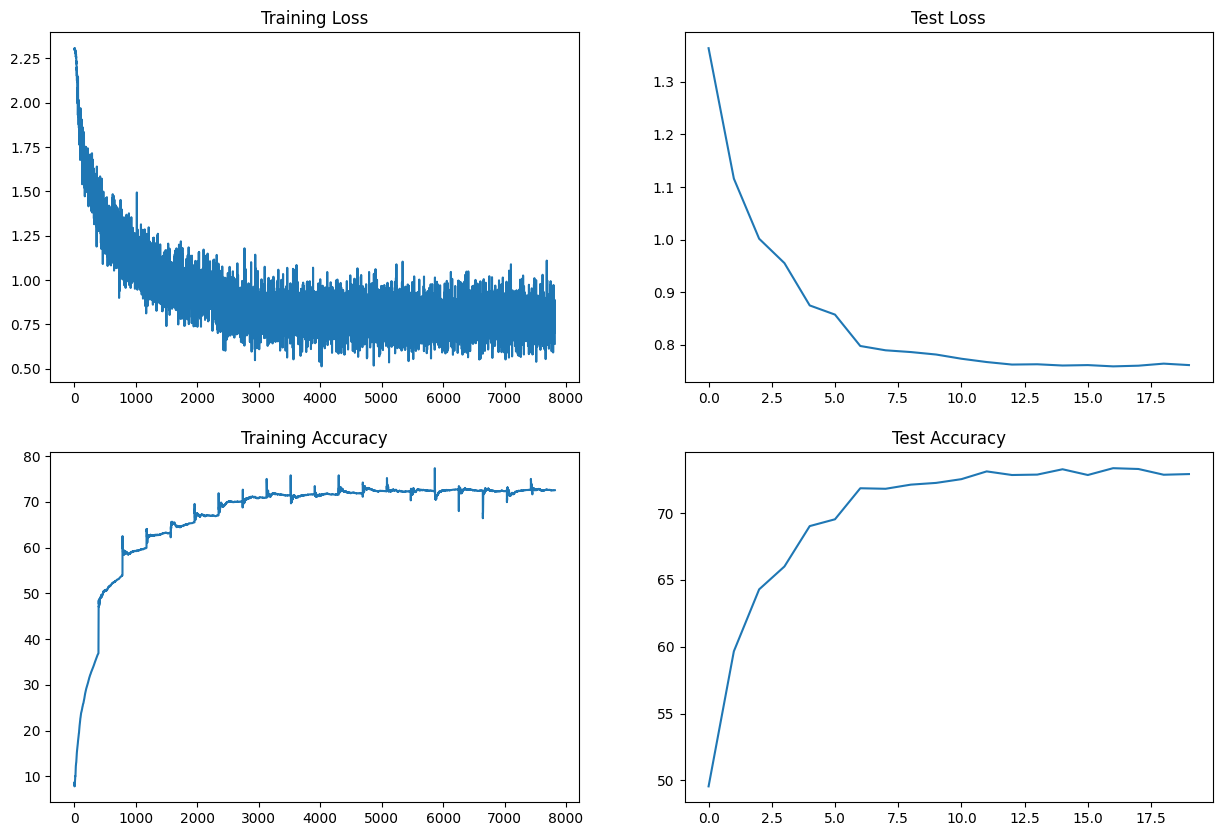

In [13]:
from train_test_models import ResultVisualisation
result_visualisation_obj = ResultVisualisation()
result_visualisation_obj.plot_accuracy_and_loss(train_losses, test_losses, train_acc, test_acc)

###**Showing some misclassified Images**

25 25 25


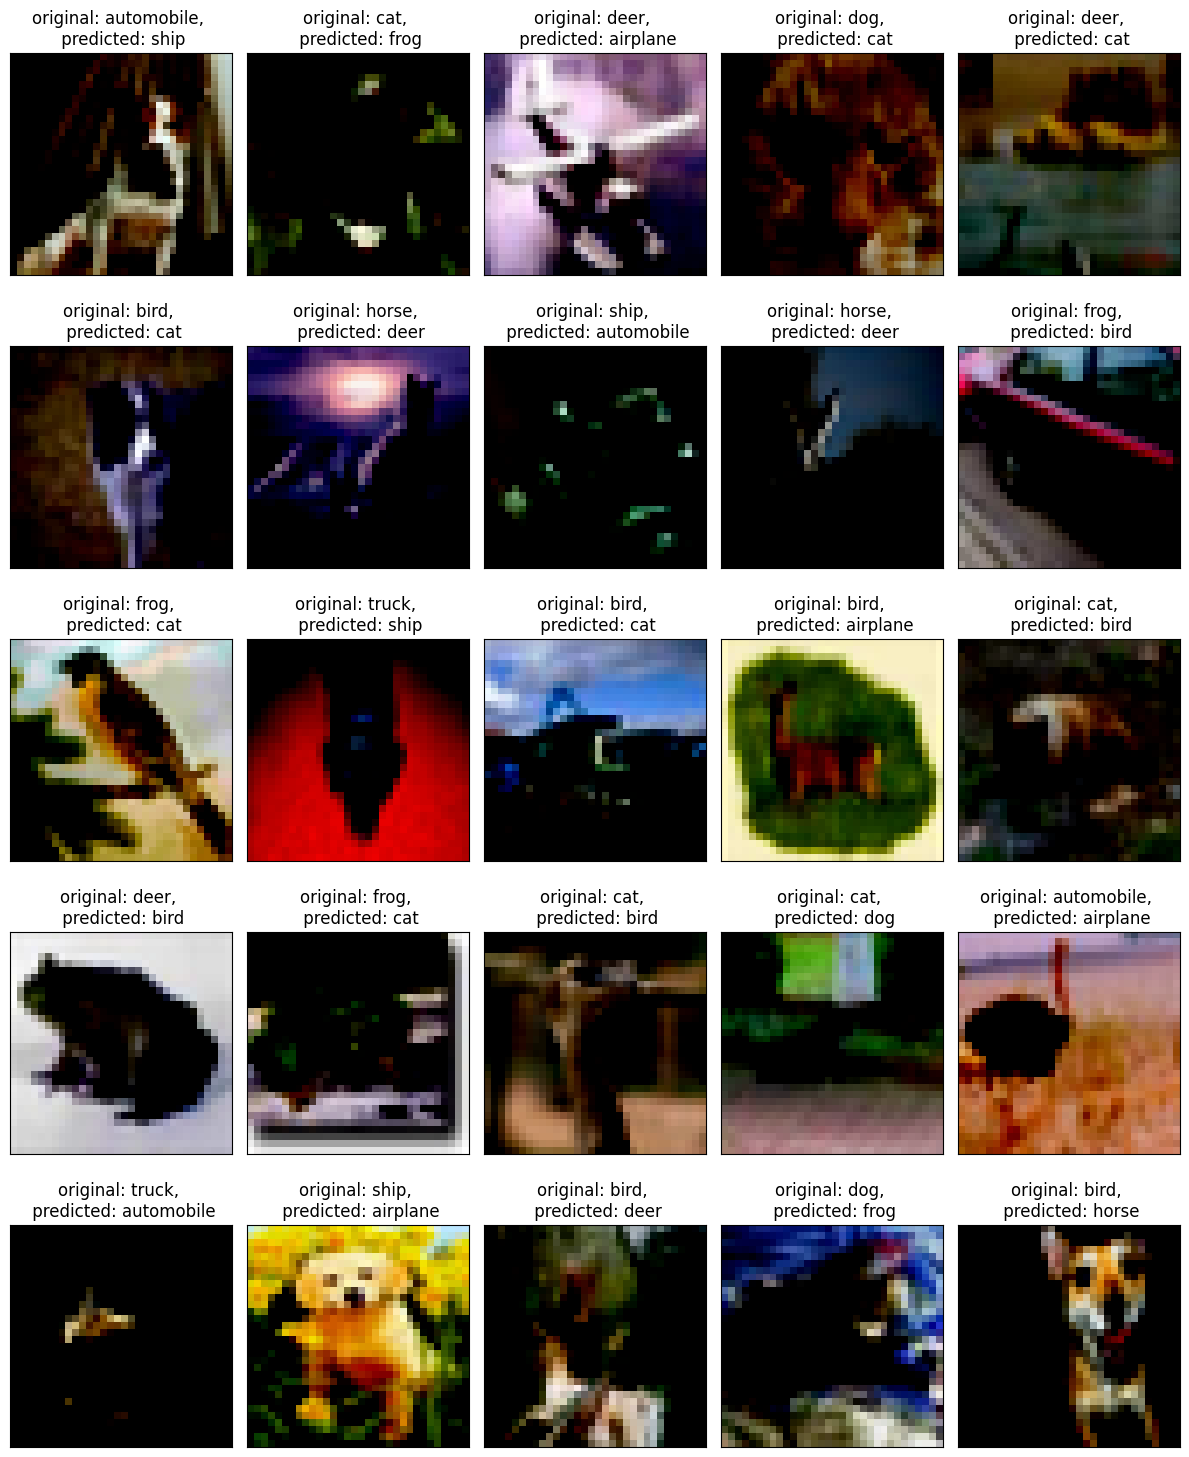

In [14]:
from utils import SampleData
sample_data = SampleData()
sample_data.show_misclassified_images(train_test_obj.misclassified_images, train_test_obj.original_labels, train_test_obj.predicted_labels, train.classes)

#**GROUP NORMALISATION**

###**Model**

In [15]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [16]:
from models import ModelGN
model = ModelGN().to(device)
summary(model, input_size = (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
         GroupNorm-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]             512
             ReLU-10           [-1, 32, 32, 32]               0
        GroupNorm-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 32,

###**Train and Test Model**

In [17]:
from train_test_models import Train_Test_With_LR_Scheduler
train_test_obj = Train_Test_With_LR_Scheduler()
train_losses, test_losses, train_acc, test_acc = train_test_obj.train_and_test_model(model, device, 20, train_loader, test_loader)

EPOCH: 0


loss=1.5114681720733643 Batch_id=390 Accuracy=35.57: 100%|██████████| 391/391 [01:33<00:00,  4.17it/s]



 Test set: Average loss: 1.4599, Accuracy: 4607/10000 (46.07%)

EPOCH: 1


loss=1.2627731561660767 Batch_id=390 Accuracy=51.20: 100%|██████████| 391/391 [01:39<00:00,  3.94it/s]



 Test set: Average loss: 1.2129, Accuracy: 5550/10000 (55.50%)

EPOCH: 2


loss=1.0560367107391357 Batch_id=390 Accuracy=57.80: 100%|██████████| 391/391 [01:34<00:00,  4.15it/s]



 Test set: Average loss: 1.1701, Accuracy: 5823/10000 (58.23%)

EPOCH: 3


loss=0.881939709186554 Batch_id=390 Accuracy=62.04: 100%|██████████| 391/391 [01:34<00:00,  4.15it/s]



 Test set: Average loss: 0.9677, Accuracy: 6594/10000 (65.94%)

EPOCH: 4


loss=0.9095507860183716 Batch_id=390 Accuracy=64.88: 100%|██████████| 391/391 [01:36<00:00,  4.05it/s]



 Test set: Average loss: 0.9198, Accuracy: 6739/10000 (67.39%)

EPOCH: 5


loss=0.9377381205558777 Batch_id=390 Accuracy=66.48: 100%|██████████| 391/391 [01:34<00:00,  4.15it/s]



 Test set: Average loss: 0.9098, Accuracy: 6779/10000 (67.79%)

EPOCH: 6


loss=0.8192542791366577 Batch_id=390 Accuracy=70.51: 100%|██████████| 391/391 [01:32<00:00,  4.21it/s]



 Test set: Average loss: 0.8074, Accuracy: 7132/10000 (71.32%)

EPOCH: 7


loss=0.8555099368095398 Batch_id=390 Accuracy=71.52: 100%|██████████| 391/391 [01:31<00:00,  4.30it/s]



 Test set: Average loss: 0.8020, Accuracy: 7172/10000 (71.72%)

EPOCH: 8


loss=0.8489216566085815 Batch_id=390 Accuracy=71.62: 100%|██████████| 391/391 [01:29<00:00,  4.35it/s]



 Test set: Average loss: 0.7869, Accuracy: 7237/10000 (72.37%)

EPOCH: 9


loss=0.7789546251296997 Batch_id=390 Accuracy=72.08: 100%|██████████| 391/391 [01:30<00:00,  4.31it/s]



 Test set: Average loss: 0.8019, Accuracy: 7152/10000 (71.52%)

EPOCH: 10


loss=0.8359204530715942 Batch_id=390 Accuracy=72.30: 100%|██████████| 391/391 [01:30<00:00,  4.32it/s]



 Test set: Average loss: 0.7860, Accuracy: 7227/10000 (72.27%)

EPOCH: 11


loss=0.7422622442245483 Batch_id=390 Accuracy=72.61: 100%|██████████| 391/391 [01:28<00:00,  4.41it/s]



 Test set: Average loss: 0.7729, Accuracy: 7300/10000 (73.00%)

EPOCH: 12


loss=0.7910369038581848 Batch_id=390 Accuracy=73.10: 100%|██████████| 391/391 [01:29<00:00,  4.37it/s]



 Test set: Average loss: 0.7747, Accuracy: 7294/10000 (72.94%)

EPOCH: 13


loss=0.6775328516960144 Batch_id=390 Accuracy=73.33: 100%|██████████| 391/391 [01:30<00:00,  4.30it/s]



 Test set: Average loss: 0.7748, Accuracy: 7290/10000 (72.90%)

EPOCH: 14


loss=0.6737262606620789 Batch_id=390 Accuracy=73.27: 100%|██████████| 391/391 [01:30<00:00,  4.32it/s]



 Test set: Average loss: 0.7779, Accuracy: 7274/10000 (72.74%)

EPOCH: 15


loss=0.9106372594833374 Batch_id=390 Accuracy=73.26: 100%|██████████| 391/391 [01:30<00:00,  4.33it/s]



 Test set: Average loss: 0.7725, Accuracy: 7288/10000 (72.88%)

EPOCH: 16


loss=0.813610851764679 Batch_id=390 Accuracy=73.37: 100%|██████████| 391/391 [01:30<00:00,  4.34it/s]



 Test set: Average loss: 0.7754, Accuracy: 7285/10000 (72.85%)

EPOCH: 17


loss=0.6826456189155579 Batch_id=390 Accuracy=73.26: 100%|██████████| 391/391 [01:30<00:00,  4.33it/s]



 Test set: Average loss: 0.7725, Accuracy: 7303/10000 (73.03%)

EPOCH: 18


loss=0.721723735332489 Batch_id=390 Accuracy=73.32: 100%|██████████| 391/391 [01:29<00:00,  4.35it/s]



 Test set: Average loss: 0.7740, Accuracy: 7288/10000 (72.88%)

EPOCH: 19


loss=0.7720028162002563 Batch_id=390 Accuracy=73.28: 100%|██████████| 391/391 [01:29<00:00,  4.36it/s]



 Test set: Average loss: 0.7739, Accuracy: 7290/10000 (72.90%)



###**Visualise train and test performance**

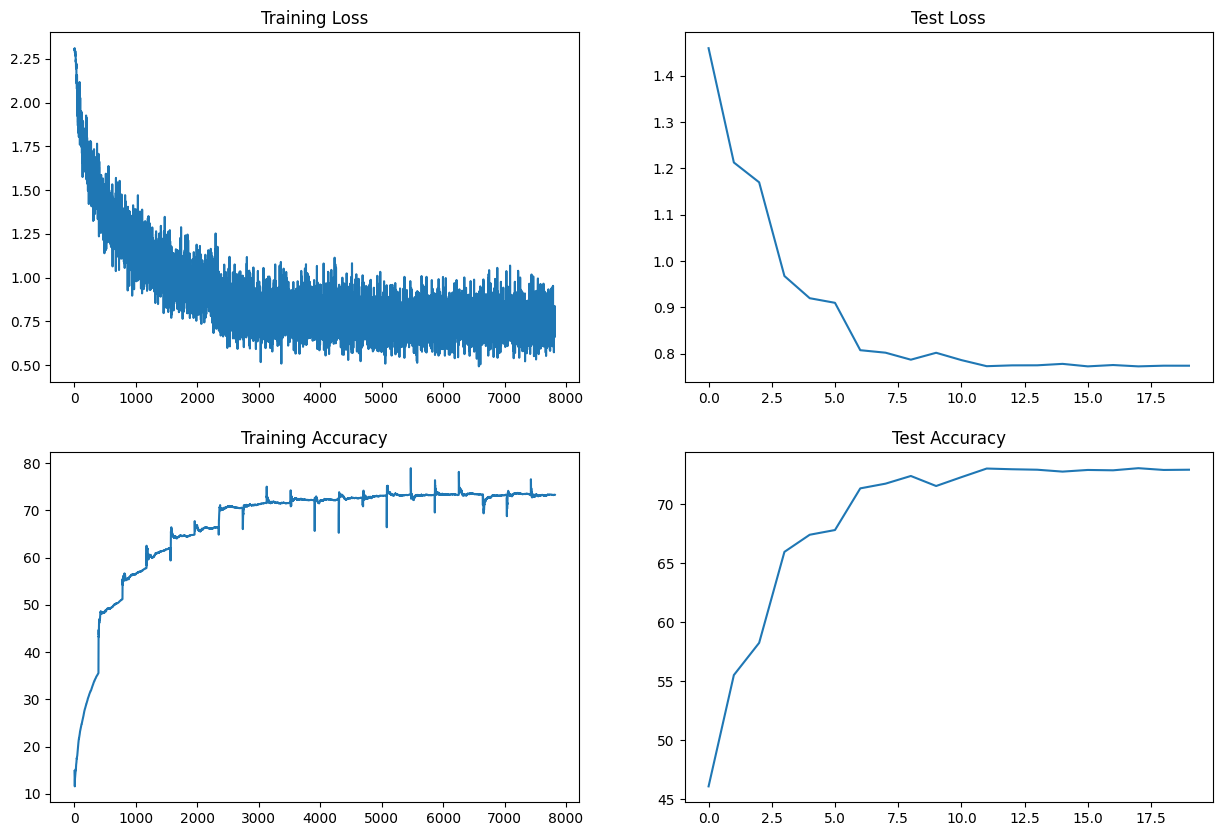

In [18]:
from train_test_models import ResultVisualisation
result_visualisation_obj = ResultVisualisation()
result_visualisation_obj.plot_accuracy_and_loss(train_losses, test_losses, train_acc, test_acc)

###**Showing some misclassified Images**


25 25 25


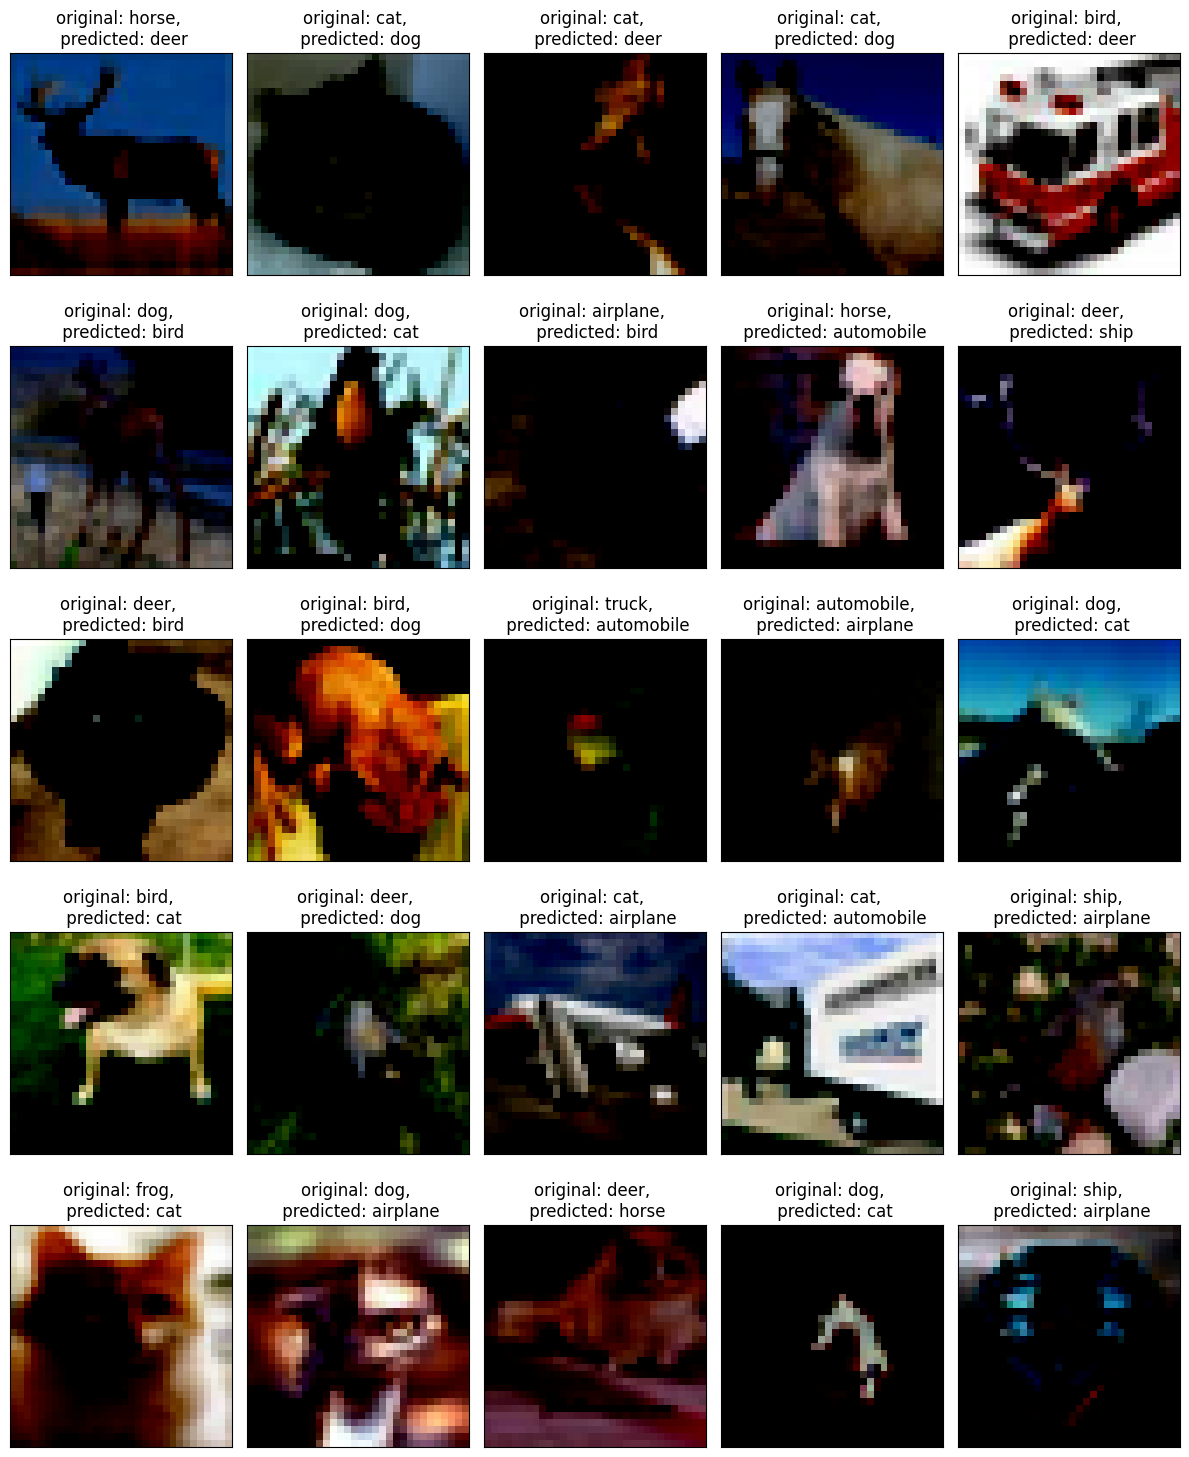

In [19]:
from utils import SampleData
sample_data = SampleData()
sample_data.show_misclassified_images(train_test_obj.misclassified_images, train_test_obj.original_labels, train_test_obj.predicted_labels, train.classes)